In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Some Categorical Data

In [94]:
samples = 100
X1 = np.concatenate((np.random.normal(0, 1, samples), np.random.normal(5, 1, samples)))
X2 = np.concatenate((np.random.normal(0, 1, samples), np.random.normal(5, 1, samples)))
X = np.vstack((X1, X2)).T
S = np.concatenate((np.zeros(samples), np.ones(samples)))

In [95]:
marks = S.tolist()

In [96]:
marks[marks == 0] = 'x'
marks[marks == 1] = '.'

Text(0, 0.5, 'X2')

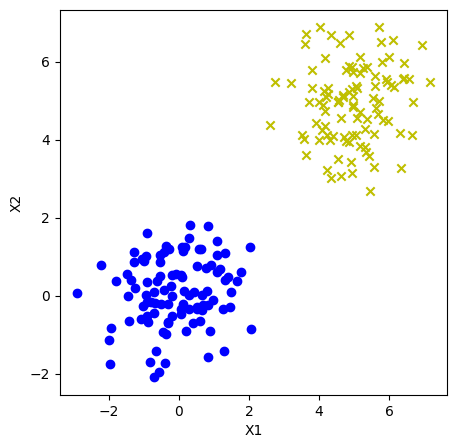

In [97]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(X1[S==0], X2[S==0], c='b', marker='o')
plt.scatter(X1[S==1], X2[S==1], c='y', marker='x')
plt.xlabel('X1')
plt.ylabel('X2')

# Support Vector Machine

Basic SVMs are built on finding a linear hyperplane which can separate the two classes of data, such that the margin i.e. the distance between the support vectors (data closest to the hyperplane in each class) and the hyperplane is maximized. 

The hyperplane is a set of points $x$ which follows the equation $wx + b = 0$, where $w$ is the weight vector (perpendicular to the hyperplane and parallel to the margin), and $b$ is the bias. 

The optimization for the margin is performed by two objective functions $J$:

$$(1) \quad \quad \quad \frac{1}{2} \lambda ||w||^2 \text{\quad \quad if \quad} y_i (wx_i + b) \geq 1 \forall i$$
and
$$(2) \quad \quad \quad \frac{1}{2} \lambda ||w||^2 + 1 - y_i (wx_i + b) \text{\quad \quad otherwise}$$

This leads us to two sets of gradients wrt $w$ and $b$.

In case (1), the gradients are:
$$\frac{dJ}{dw_k} = \lambda w_k \text{\quad and \quad} \frac{dJ}{db} = 0$$
In case (2), the gradients are:
$$\frac{dJ}{dw_k} = \lambda w_k - y_i x_i \text{\quad and \quad} \frac{dJ}{db} = -y_i$$

# Change Class Labelling to -1 and 1

In [141]:
S_ = np.where(S <= 0, -1, 1)

# Initialize Weights and Bias

In [111]:
w = np.zeros(X.shape[1])

In [112]:
b = 0

# Define Function for Optimization

In [113]:
def optimization(X, S_, weights, bias, lambda_=1, lr=0.01):
    for idx, x_i in enumerate(X):
        condition = S_[idx] * (np.dot(x_i, weights) - bias) >= 1
        if condition:
            weights = weights - lr * (2 * lambda_ * weights)
        else:
            weights = weights - lr * (2 * lambda_ * weights - np.dot(x_i, S_[idx]))
            bias = bias - lr * S_[idx]

    return weights, bias

# Run All Epochs to Find Best Parameters

In [117]:
for epoch in range(10000):
    weight, bias = optimization(X, S_, w, b)
    if epoch % 1000 == 0:
        print(f'Iteration {epoch}.')

Iteration 0.
Iteration 1000.
Iteration 2000.
Iteration 3000.
Iteration 4000.
Iteration 5000.
Iteration 6000.
Iteration 7000.
Iteration 8000.
Iteration 9000.


# Testing on Train Data

In [118]:
pred = np.dot(X, weight) - bias
pred = np.where(pred <= 0, 0, 1)

Text(0, 0.5, 'X2')

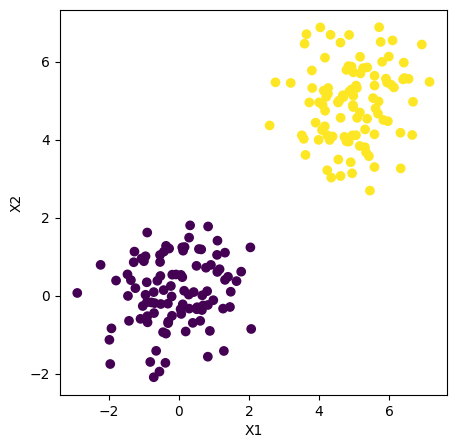

In [119]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(X1, X2, c=pred)
plt.xlabel('X1')
plt.ylabel('X2')

# A Neater Approach With OOP

In [130]:
class SupportVectorClassifier():
    def __init__(self, lr=0.01, lambda_factor=1, epochs=10000):
        self.lr = lr
        self.lambda_ = lambda_factor
        self.epochs = epochs
        self.weights = None
        self.bias = 0
    
    def init_parameters(self, X):
        self.weights = np.zeros(X.shape[1])

    def optimization(self, X, y):
        for idx, x_i in enumerate(X):
            condition = y[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
            if condition:
                self.weights = self.weights - self.lr * (2 * self.lambda_ * self.weights)
            else:
                self.weights = self.weights - self.lr * (2 * self.lambda_ * self.weights - np.dot(x_i, y[idx]))
                self.bias = self.bias - self.lr * y[idx]

    def fit(self, X, y):

        self.init_parameters(X)
        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.epochs):
            self.optimization(X, y_)

    def predict(self, X):

        pred = np.dot(X, self.weights) - self.bias
        pred = np.where(pred <= 0, 0, 1)

        return pred

In [131]:
svc = SupportVectorClassifier()
svc.fit(X, S)

In [132]:
pred = svc.predict(X)

Text(0, 0.5, 'X2')

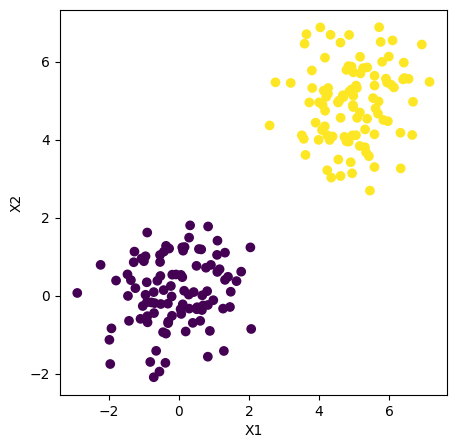

In [133]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.xlabel('X1')
plt.ylabel('X2')

# Make Some New X, S for Prediction Using Similar Scheme As Train Data

(Could have split data into test and train instead of doing this)

In [136]:
samples = 10
X1_test = np.concatenate((np.random.normal(0, 1, samples), np.random.normal(5, 1, samples)))
X2_test = np.concatenate((np.random.normal(0, 1, samples), np.random.normal(5, 1, samples)))
X_test = np.vstack((X1_test, X2_test)).T
S_test = np.concatenate((np.zeros(samples), np.ones(samples)))

In [137]:
predictions = svc.predict(X_test)

Text(0, 0.5, 'X2')

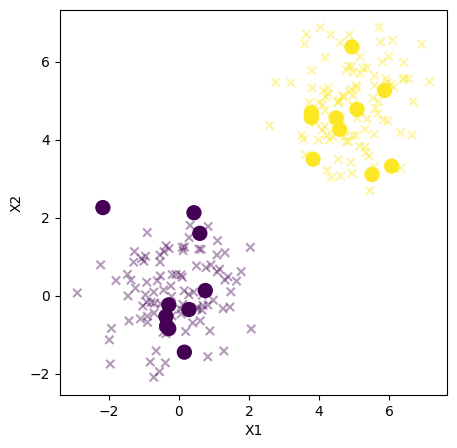

In [139]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, marker='o', s=100)
plt.scatter(X[:, 0], X[:, 1], c=S, marker='x', alpha=0.4)
plt.xlabel('X1')
plt.ylabel('X2')